In [288]:
# Basic library required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [289]:
# To read the dataset
house = pd.read_csv("train.csv",na_values="NAN")

In [290]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [291]:
# To understand the shape of datset
house.shape

(1460, 81)

In [292]:
# To read the first few rows of the data set
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [293]:
!pip install sweetviz

In [294]:
# Auto EDA
import sweetviz as sv
auto_EDA = sv.analyze(house,pairwise_analysis="off")
auto_EDA.show_html('auto_EDA.html')

                                             |                                             | [  0%]   00:00 ->…

Report auto_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


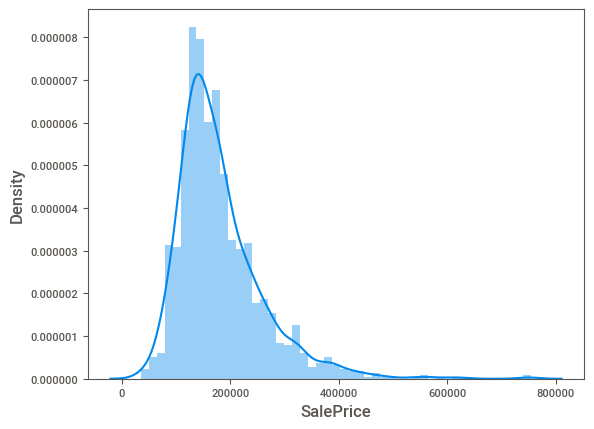

In [295]:
#To understand the skewness of Saleprice 
#The Saleprice is left skewed 
sns.distplot(house.SalePrice)
plt.show()

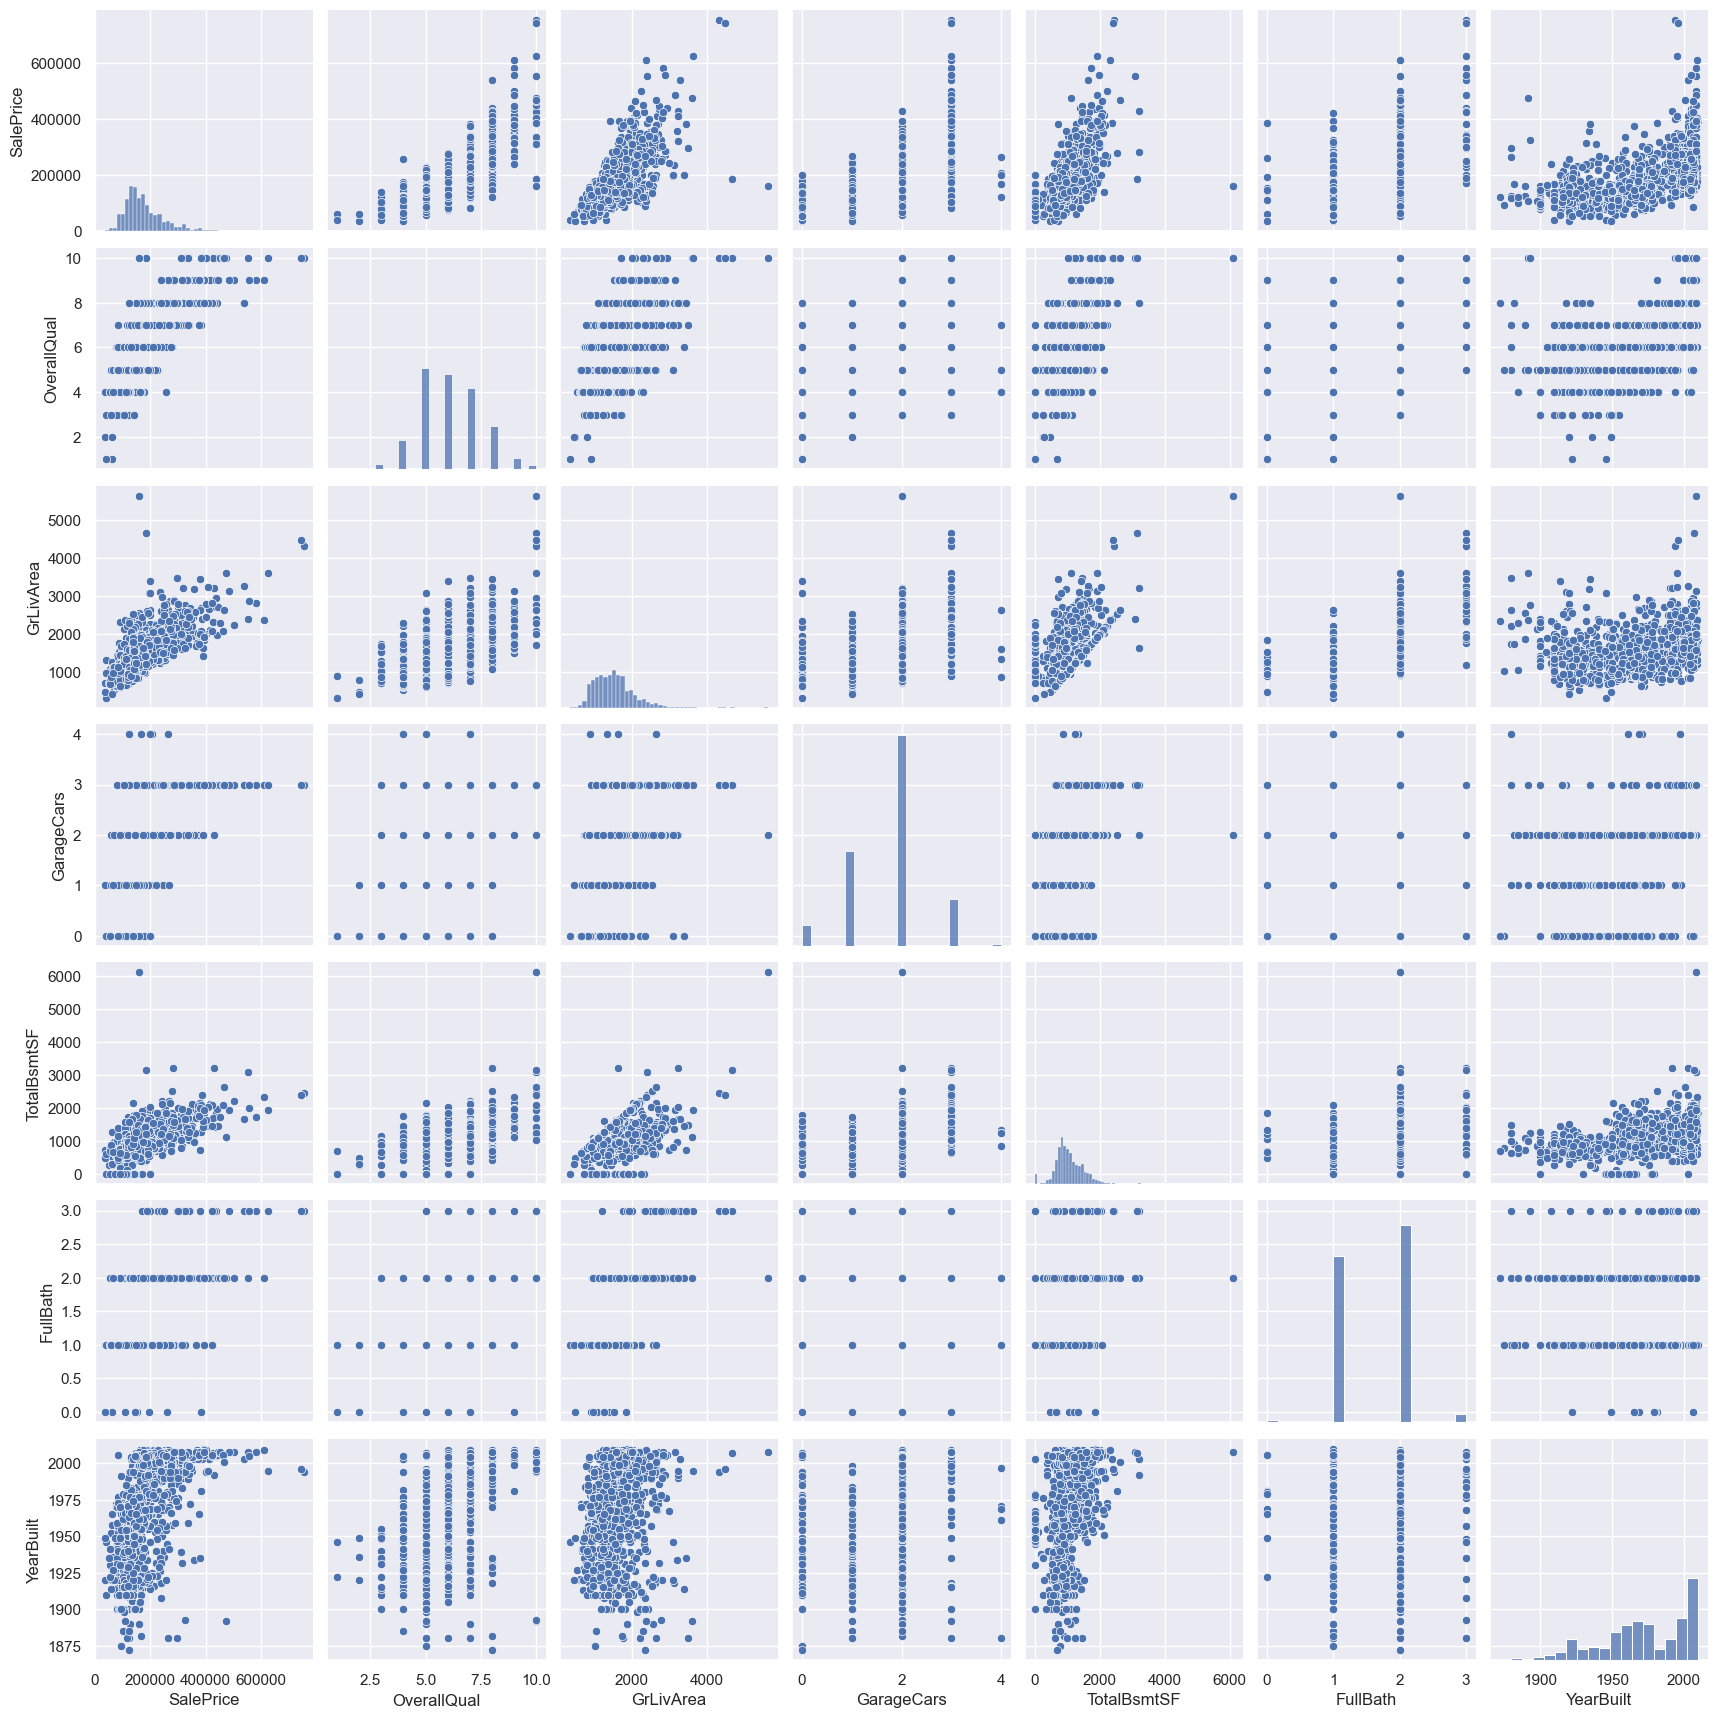

In [296]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols], size = 2.5)
plt.show();

# There is a increasing trend for
    # TotalBsmtSF and sale price
    #GrLivArea and Sale price
    #

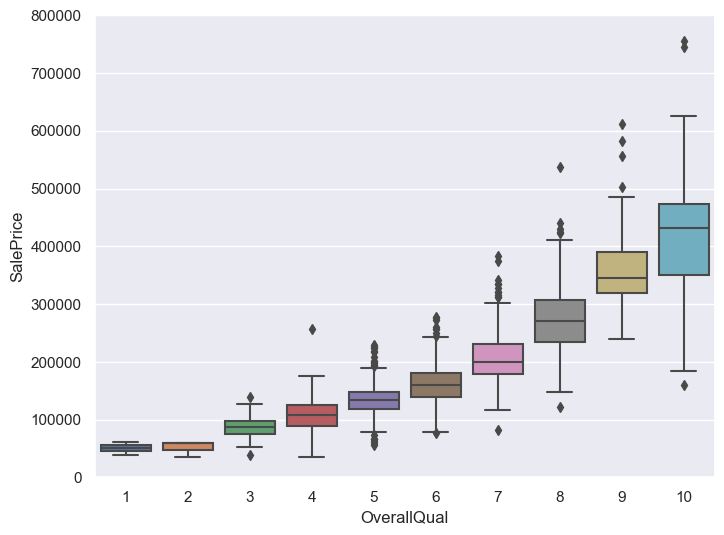

In [297]:
# To understand the overall qual and sale price 
# if the quality is increasing the sale price increases
#There is also a increase in variance for the increased quality as well
var = 'OverallQual'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

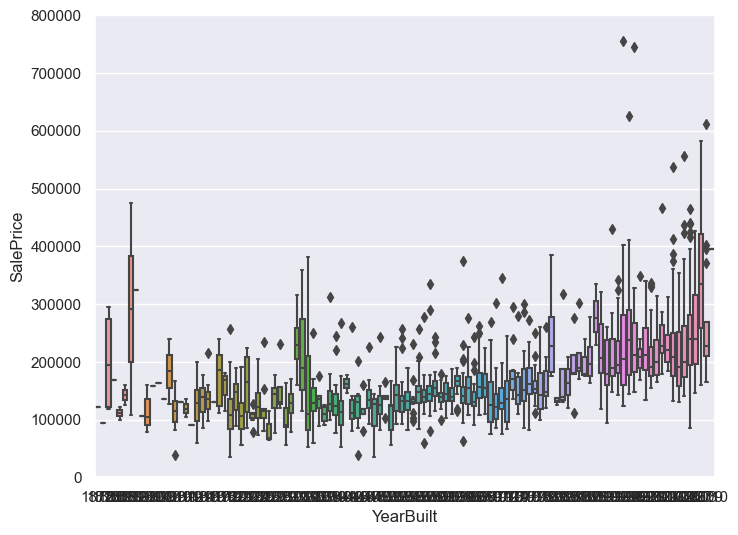

In [298]:
# To understand the sale price and the year built trend
var = 'YearBuilt'
data1 = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data1)
fig.axis(ymin=0, ymax=800000);
plt.show()
#The sale price is increasing if the Overall quality is increasing 
# the Latest built houses has more sale price than the others

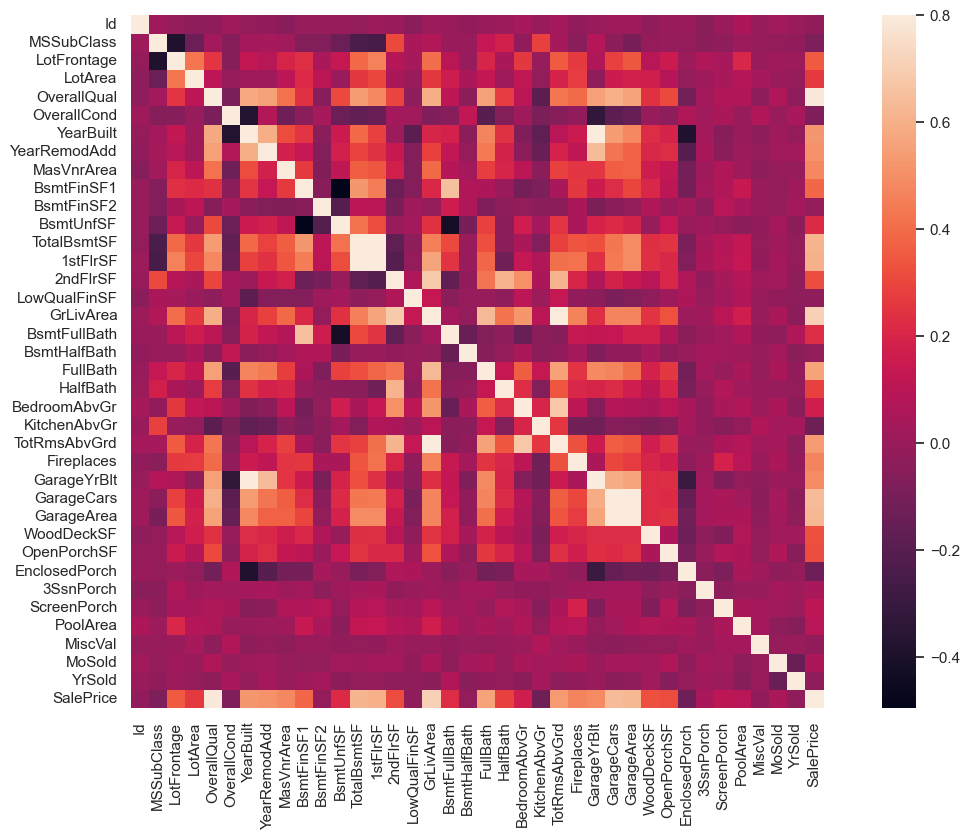

In [299]:
#correlation matrix
cor_mat = house.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(cor_mat, vmax=.8, square=True);
plt.show()

# Overall qual has a high correlation with sale price

In [300]:
k = 10 #number of variables for heatmap
cols = cor_mat.nlargest(k, 'SalePrice')['SalePrice'].index

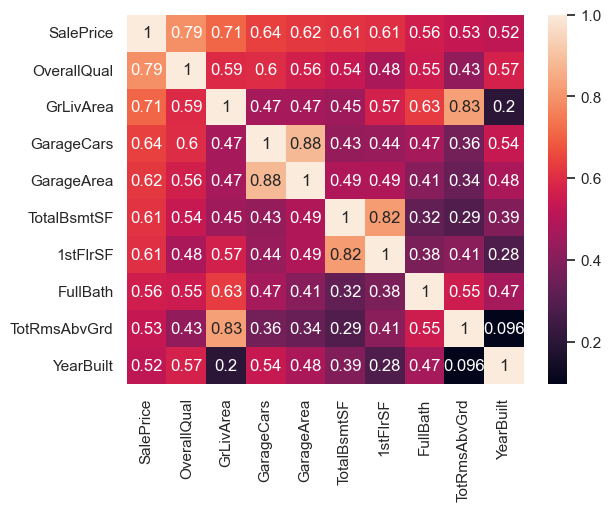

In [301]:
sns.heatmap(house[cols].corr() , annot= True)
plt.show()

In [302]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Missing values
    # There are some na values in categorical values which makes a real sense to data as it actually not na
    # replace the na with the median value of numerical values


In [303]:
# null values that has a meaning in the columns

null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [304]:
for i in null_has_meaning:
    house[i].fillna("None", inplace=True)
    house[i].fillna("None", inplace=True)

In [305]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [306]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy="median")

In [307]:
# To get the total value of NA values 
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000


In [308]:
# Lotfronatage has a too many missing values lets drop that
house.drop("LotFrontage", axis=1, inplace=True)

In [309]:
#as MasVnrType is categorical variable lets replace the na values with none
#GarageYrBlt & MasVnrArea is a numeric variable replace the na values with median
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)
house["MasVnrType"].fillna("None", inplace=True)

In [310]:
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Electrical,1,0.000685
MSSubClass,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000


In [311]:
# lets drop the electrical column as well
house.dropna(inplace=True)

In [312]:
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Id,0,0.0
MSSubClass,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0


In [313]:
# Auto EDA
import sweetviz as sv
auto_EDA = sv.analyze(house,pairwise_analysis="off")
auto_EDA.show_html('auto_EDA.html')

                                             |                                             | [  0%]   00:00 ->…

Report auto_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [314]:
# To define the data types 
types_train = house.dtypes 
num_train = types_train[(types_train == 'int64') | (types_train == float)] 
cat_train = types_train[types_train == object]

In [315]:
# to convert the numerical variables in to a list
numerical_values_train = list(num_train.index)
print(numerical_values_train)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [316]:
# To convert the categorical variables in to a list
categorical_values_train = list(cat_train.index)
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [317]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

object     43
int64      35
float64     2
Name: 0, dtype: int64

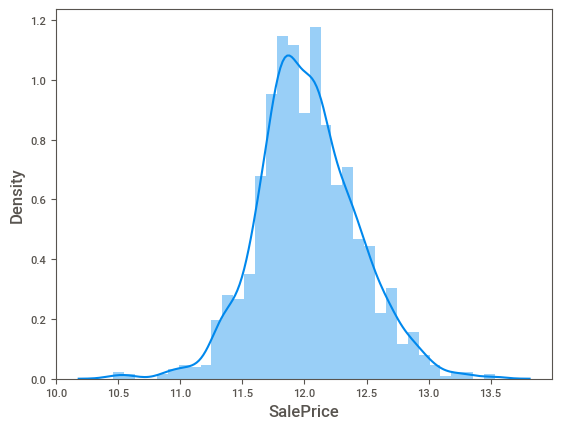

In [318]:
# from earlier distplot we found saleprice is little skewed towards left 
# Machine learning model works better with the normal models
# To increase the model performance the target variable is converted
sns.distplot(np.log(house["SalePrice"]))
plt.show()

In [319]:
# using the normalised value as our target variable
house["TransformedPrice"] = np.log(house["SalePrice"])

In [320]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,None,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,None,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,None,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,None,0,12,2008,WD,Normal,250000,12.429216


In [322]:
# to convert the categorical variable in to numbers
for i in categorical_values_train:
    feature_set = set(house[i])
    for j in feature_set:
        feature_list = list(feature_set)
        house.loc[house[i] == j, i] = feature_list.index(j)

In [323]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,4,8450,0,0,3,1,1,3,...,0,4,2,0,2,2008,2,0,208500,12.247694
1,2,20,4,9600,0,0,3,1,1,1,...,0,4,2,0,5,2007,2,0,181500,12.109011
2,3,60,4,11250,0,0,2,1,1,3,...,0,4,2,0,9,2008,2,0,223500,12.317167
3,4,70,4,9550,0,0,2,1,1,4,...,0,4,2,0,2,2006,2,1,140000,11.849398
4,5,60,4,14260,0,0,2,1,1,1,...,0,4,2,0,12,2008,2,0,250000,12.429216


In [324]:
house.MSZoning.value_counts()

4    1150
0     218
3      65
2      16
1      10
Name: MSZoning, dtype: int64

In [325]:
# Model Building

X = house.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).values
y = house["TransformedPrice"].values

In [326]:
# for converting in to train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [327]:
# fitting the data with normal Linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9151943089320577
Testing R2
0.12333424022515771


In [328]:
# if alpha = 0 no change with the unregularized linear model or over fitting
lr = Lasso(alpha=0)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9151943089320576
Testing R2
0.12333424022507122


In [329]:
# if alpha is higher it is underfitting
lr = Lasso(alpha=200)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.05882540874216813
Testing R2
0.06894492667170171


In [330]:
lr.coef_

array([-0.00000000e+00,  0.00000000e+00,  7.72803027e-06, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [331]:
# optimizing the model
lr = Lasso(alpha=0.002)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.8891432432575975
Testing R2
0.8292741165724528


In [332]:
lr.coef_

array([-5.62034628e-04,  2.24411508e-02,  1.55343031e-06, -0.00000000e+00,
        1.62276677e-03, -0.00000000e+00, -2.15451348e-02,  0.00000000e+00,
        0.00000000e+00, -3.99044786e-03, -3.41187787e-04, -6.92681962e-03,
       -7.98289651e-02, -1.40653698e-03,  0.00000000e+00,  7.16529397e-02,
        4.29005845e-02,  2.54501990e-03,  9.80548241e-04,  1.44557696e-02,
       -3.15665002e-02, -0.00000000e+00,  1.07563811e-03, -0.00000000e+00,
        1.53281913e-05,  1.21734563e-03,  1.67739666e-03,  5.10076598e-03,
       -2.83220900e-02, -0.00000000e+00, -1.53170046e-02, -2.75849326e-03,
        5.83779384e-05,  3.72360005e-03,  5.70294343e-05,  1.27456754e-05,
        9.22664243e-06,  0.00000000e+00, -1.39877625e-02,  1.28618826e-02,
        0.00000000e+00,  2.32975538e-04,  2.27310227e-04,  2.29561199e-04,
        2.96053656e-05,  4.05891448e-02,  0.00000000e+00,  1.19127344e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        8.12742241e-04,  

In [333]:
# list of alphas to tune
params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.02, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [334]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [335]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv= GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [336]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013127,0.005808,0.001221,0.000412,0.0,{'alpha': 1e-08},-0.080689,-0.100532,-0.102009,-0.093537,...,-0.094746,0.007619,1,-0.084804,-0.080686,-0.075002,-0.083239,-0.081750,-0.081096,0.003349
1,0.011520,0.006415,0.000906,0.000203,0.0,{'alpha': 1e-07},-0.080688,-0.100532,-0.102009,-0.093652,...,-0.094769,0.007615,2,-0.084805,-0.080686,-0.075002,-0.083240,-0.081751,-0.081097,0.003349
2,0.010489,0.006340,0.000776,0.000391,0.000001,{'alpha': 1e-06},-0.080684,-0.100531,-0.102007,-0.094798,...,-0.094995,0.007596,3,-0.084806,-0.080688,-0.075003,-0.083255,-0.081751,-0.081101,0.003351
3,0.006176,0.001162,0.000805,0.000403,0.00001,{'alpha': 1e-05},-0.080641,-0.100517,-0.101984,-0.098867,...,-0.095778,0.007757,5,-0.084827,-0.080708,-0.075015,-0.083312,-0.081767,-0.081126,0.003359
4,0.005328,0.000865,0.000812,0.000376,0.0001,{'alpha': 0.0001},-0.080389,-0.100621,-0.101790,-0.098473,...,-0.095483,0.007790,4,-0.085074,-0.080917,-0.075202,-0.083262,-0.081942,-0.081279,0.003342


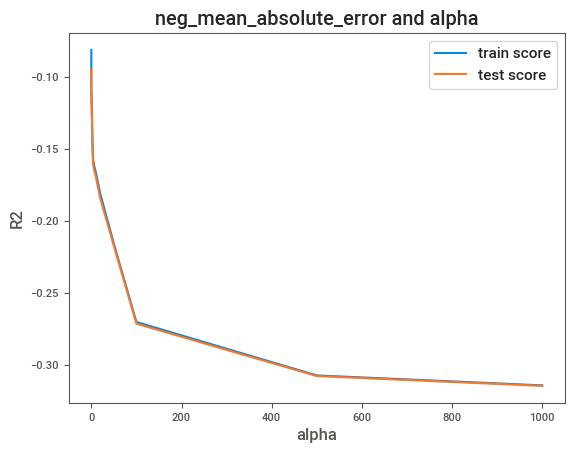

In [337]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("neg_mean_absolute_error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [338]:
params1 = {'alpha': [0.002, 0.01, 0.02,0.03,0.04,0.05,0.06,0.07,0.008,0.09,0.1,]}

In [339]:
lasso = Lasso()

folds = 5
model_cv= GridSearchCV(estimator=lasso,param_grid=params1,scoring='r2',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.002, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                   0.07, 0.008, 0.09, 0.1]},
             return_train_score=True, scoring='r2', verbose=1)

In [340]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004927,0.000919,0.000919,0.000504,0.002,{'alpha': 0.002},0.854250,0.859975,0.821268,0.604012,...,0.809104,0.106046,1,0.887043,0.894384,0.900249,0.910933,0.883711,0.895264,0.009718
1,0.003600,0.001020,0.001022,0.000045,0.01,{'alpha': 0.01},0.831166,0.864969,0.822320,0.604412,...,0.804554,0.103751,3,0.868239,0.866637,0.880223,0.895054,0.861255,0.874282,0.012095
2,0.002616,0.000504,0.000799,0.000400,0.02,{'alpha': 0.02},0.827094,0.858037,0.810679,0.581740,...,0.794963,0.110623,4,0.860856,0.858889,0.870593,0.886145,0.852235,0.865743,0.011774
3,0.007757,0.002399,0.001003,0.000004,0.03,{'alpha': 0.03},0.820203,0.847868,0.797661,0.548845,...,0.781349,0.120449,5,0.850673,0.848176,0.860821,0.876075,0.842014,0.855551,0.011920
4,0.009902,0.001908,0.001463,0.000573,0.04,{'alpha': 0.04},0.813996,0.835193,0.782946,0.516312,...,0.766651,0.129488,6,0.840153,0.835838,0.849359,0.865896,0.829725,0.844194,0.012595


In [341]:
# to find the best params for the Lasso regression
model_cv.best_params_

{'alpha': 0.002}

In [392]:
# Best model based on Lasso
lasso_final = Lasso(alpha=0.002)
lasso_final.fit(X_train,y_train)
print("Training R2")
print(lasso_final.score(X_train,y_train))
print("Testing R2")
print(lasso_final.score(X_test,y_test))

Training R2
0.8891432432575975
Testing R2
0.8292741165724528


In [343]:
# Model Co-efficents
lr2.coef_

array([-5.62034628e-04,  2.24411508e-02,  1.55343031e-06, -0.00000000e+00,
        1.62276677e-03, -0.00000000e+00, -2.15451348e-02,  0.00000000e+00,
        0.00000000e+00, -3.99044786e-03, -3.41187787e-04, -6.92681962e-03,
       -7.98289651e-02, -1.40653698e-03,  0.00000000e+00,  7.16529397e-02,
        4.29005845e-02,  2.54501990e-03,  9.80548241e-04,  1.44557696e-02,
       -3.15665002e-02, -0.00000000e+00,  1.07563811e-03, -0.00000000e+00,
        1.53281913e-05,  1.21734563e-03,  1.67739666e-03,  5.10076598e-03,
       -2.83220900e-02, -0.00000000e+00, -1.53170046e-02, -2.75849326e-03,
        5.83779384e-05,  3.72360005e-03,  5.70294343e-05,  1.27456754e-05,
        9.22664243e-06,  0.00000000e+00, -1.39877625e-02,  1.28618826e-02,
        0.00000000e+00,  2.32975538e-04,  2.27310227e-04,  2.29561199e-04,
        2.96053656e-05,  4.05891448e-02,  0.00000000e+00,  1.19127344e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        8.12742241e-04,  

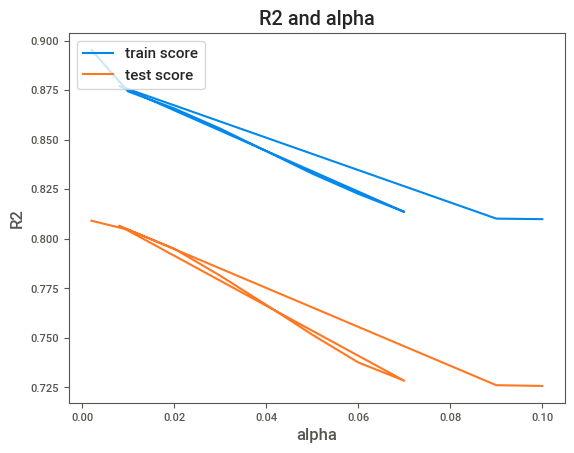

In [344]:
# to plot the R2 and alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [345]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [347]:
cv_results= pd.DataFrame(model_cv.cv_results_)
cv_results.head()
cv_results= cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005121,0.001250,0.001133,2.526802e-04,0.0,{'alpha': 1e-08},-0.080689,-0.100533,-0.102009,-0.091486,...,-0.094336,0.007727,1,-0.084804,-0.080686,-0.075002,-0.083212,-0.081750,-0.081091,0.003346
1,0.003434,0.001567,0.001002,4.261228e-06,0.0,{'alpha': 1e-07},-0.080689,-0.100533,-0.102009,-0.091487,...,-0.094336,0.007727,2,-0.084804,-0.080686,-0.075002,-0.083212,-0.081750,-0.081091,0.003346
2,0.002808,0.000750,0.001001,8.662177e-07,0.000001,{'alpha': 1e-06},-0.080689,-0.100533,-0.102009,-0.091489,...,-0.094336,0.007727,3,-0.084804,-0.080686,-0.075002,-0.083212,-0.081750,-0.081091,0.003346
3,0.002600,0.000490,0.000400,4.899209e-04,0.00001,{'alpha': 1e-05},-0.080689,-0.100533,-0.102009,-0.091516,...,-0.094342,0.007725,4,-0.084804,-0.080686,-0.075002,-0.083212,-0.081750,-0.081091,0.003346
4,0.002920,0.000513,0.000800,4.000340e-04,0.0001,{'alpha': 0.0001},-0.080688,-0.100534,-0.102009,-0.091769,...,-0.094393,0.007708,5,-0.084805,-0.080686,-0.075002,-0.083216,-0.081751,-0.081092,0.003346


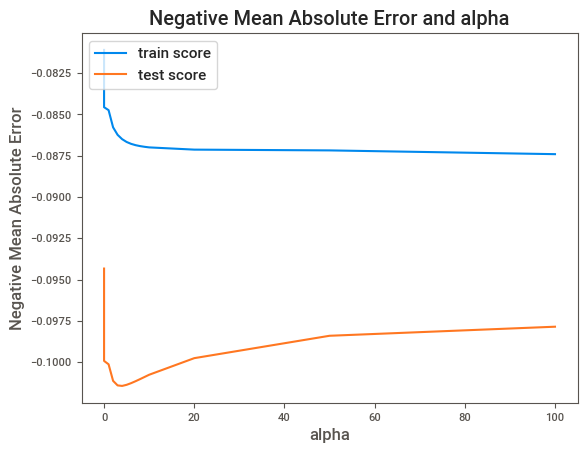

In [348]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [408]:
# Best fit value for Ridge regression
ridge_final = Ridge(alpha=100)
ridge_final.fit(X_train,y_train)
print("Training R2")
print(ridge_final.score(X_train,y_train))
print("Testing R2")
print(ridge_final.score(X_test,y_test))


Training R2
0.8888633303279492
Testing R2
0.831009904442018


In [409]:
ridge_final.coef_

array([-6.70101387e-04,  2.08446109e-02,  1.45542242e-06, -8.09965276e-03,
        1.01064535e-02, -3.38261655e-03, -2.06904523e-02,  1.76154392e-03,
        8.90604002e-04, -1.00537211e-02, -3.80204762e-04, -9.79882843e-03,
       -3.93735218e-02, -5.78801926e-03, -3.37429662e-04,  6.36473182e-02,
        4.07008604e-02,  2.33662682e-03,  1.04100625e-03,  1.50926313e-02,
       -2.82556093e-02, -7.49623979e-04,  2.18003112e-03, -5.06124853e-04,
        1.88744091e-05,  6.71263716e-03,  6.37777118e-03,  6.63424443e-03,
       -2.72233863e-02, -1.99215203e-03, -1.74258397e-02, -3.68221208e-03,
        2.85955961e-05,  6.73836990e-03,  3.34367765e-05, -1.88963305e-05,
        4.31360419e-05,  5.76990508e-03, -1.41405252e-02,  1.94909518e-02,
        2.21492328e-03,  6.33375142e-05,  5.90768167e-05,  6.17688566e-05,
        1.84183187e-04,  3.25696980e-02,  2.74806250e-03,  1.65699334e-02,
        4.78576712e-03,  9.15819592e-04, -5.56902747e-03,  1.83245021e-03,
        5.32534178e-03,  

In [410]:
x = house.drop(["Id", "SalePrice", "TransformedPrice"], axis=1)

In [411]:
betas = pd.DataFrame(index=x.columns)

In [412]:
betas.rows = x.columns

In [436]:
betas['Ridge'] = ridge_final.coef_
betas['Lasso'] = lasso_final.coef_

In [422]:
betas.Lasso.sort_values(ascending=False)

OverallQual      0.071653
OverallCond      0.042901
BsmtFullBath     0.040589
GarageCars       0.039705
MSZoning         0.022441
RoofStyle        0.014456
CentralAir       0.012862
FullBath         0.011913
Functional       0.008651
Fence            0.006827
Fireplaces       0.005571
Foundation       0.005101
BsmtFinType2     0.003724
YearBuilt        0.002545
ExterCond        0.001677
Alley            0.001623
ExterQual        0.001217
SaleCondition    0.001153
Exterior2nd      0.001076
YearRemodAdd     0.000981
TotRmsAbvGrd     0.000813
GarageFinish     0.000395
1stFlrSF         0.000233
LowQualFinSF     0.000230
ScreenPorch      0.000229
2ndFlrSF         0.000227
EnclosedPorch    0.000185
3SsnPorch        0.000140
GarageArea       0.000091
WoodDeckSF       0.000073
BsmtFinSF1       0.000058
BsmtFinSF2       0.000057
GrLivArea        0.000030
MasVnrArea       0.000015
BsmtUnfSF        0.000013
TotalBsmtSF      0.000009
LotArea          0.000002
MiscVal          0.000002
LotShape    

In [423]:
betas.Ridge.sort_values(ascending=False)

OverallQual      0.063647
OverallCond      0.040701
BsmtFullBath     0.032570
GarageCars       0.027572
MSZoning         0.020845
CentralAir       0.019491
FullBath         0.016570
RoofStyle        0.015093
Fireplaces       0.012789
Functional       0.010749
Alley            0.010106
Fence            0.007126
BsmtFinType2     0.006738
ExterQual        0.006713
Foundation       0.006634
ExterCond        0.006378
PavedDrive       0.006033
Heating          0.005770
TotRmsAbvGrd     0.005325
HalfBath         0.004786
GarageCond       0.004432
BsmtHalfBath     0.002748
YearBuilt        0.002337
Electrical       0.002215
Exterior2nd      0.002180
SaleCondition    0.001870
KitchenQual      0.001832
Utilities        0.001762
GarageFinish     0.001647
YearRemodAdd     0.001041
BedroomAbvGr     0.000916
LotConfig        0.000891
ScreenPorch      0.000236
EnclosedPorch    0.000188
GrLivArea        0.000184
3SsnPorch        0.000161
GarageArea       0.000123
WoodDeckSF       0.000083
1stFlrSF    

In [ ]:
# to drop the first 5 variables in Lasso

In [424]:
X1 = house.drop(["Id", "SalePrice", "TransformedPrice","OverallQual", "OverallCond","BsmtFullBath","GarageCars","MSZoning"], axis=1).values
y1= house["TransformedPrice"].values

In [466]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [467]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv= GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [468]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017788,0.005399,0.003553,0.000167,0.0,{'alpha': 1e-08},0.906248,0.829459,0.772829,0.819972,...,0.839396,0.045215,1,0.882342,0.894000,0.907728,0.893167,0.887743,0.892996,0.008475
1,0.015170,0.007053,0.002384,0.000616,0.0,{'alpha': 1e-07},0.906248,0.829461,0.772829,0.818510,...,0.839105,0.045345,2,0.882342,0.894000,0.907728,0.893166,0.887743,0.892996,0.008475
2,0.015001,0.007296,0.002621,0.001003,0.000001,{'alpha': 1e-06},0.906253,0.829480,0.772833,0.801744,...,0.835768,0.047327,3,0.882342,0.894000,0.907728,0.893160,0.887743,0.892994,0.008475
3,0.010525,0.001309,0.002170,0.000431,0.00001,{'alpha': 1e-05},0.906298,0.829674,0.772867,0.513434,...,0.778256,0.139595,5,0.882340,0.893998,0.907726,0.893042,0.887742,0.892970,0.008475
4,0.009135,0.001020,0.002636,0.000721,0.0001,{'alpha': 0.0001},0.906129,0.831453,0.773147,0.513280,...,0.779477,0.140328,4,0.882132,0.893821,0.907566,0.892957,0.887626,0.892820,0.008481


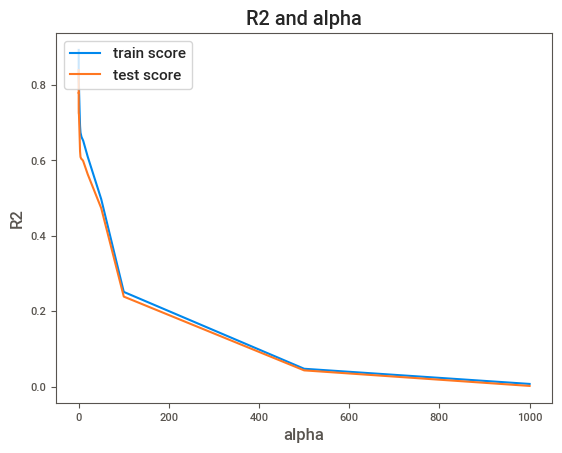

In [469]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [465]:
lasso_new= Lasso(alpha=0.005)
lasso_new.fit(X_train,y_train)
print("Training R2")
print(lasso_new.score(X_train,y_train))
print("Testing R2")
print(lasso_new.score(X_test,y_test))

Training R2
0.8457199661743027
Testing R2
0.7636002683127341


In [451]:
X1 = house.drop(["Id", "SalePrice", "TransformedPrice","OverallQual", "OverallCond","BsmtFullBath","GarageCars","MSZoning"], axis=1)


In [452]:
betas = pd.DataFrame(index=X1.columns)

In [453]:
betas.rows = X1.columns

In [471]:
betas['Lasso'] = lasso_new.coef_

In [472]:
betas.Lasso.sort_values(ascending=False)

Functional       0.023369
CentralAir       0.010064
Electrical       0.008285
Foundation       0.005905
ExterQual        0.003798
RoofStyle        0.003400
YearBuilt        0.002837
YearRemodAdd     0.002683
KitchenQual      0.001847
Fireplaces       0.001402
Exterior2nd      0.000899
MoSold           0.000493
ScreenPorch      0.000297
2ndFlrSF         0.000286
1stFlrSF         0.000281
GarageArea       0.000246
LowQualFinSF     0.000214
EnclosedPorch    0.000193
3SsnPorch        0.000175
WoodDeckSF       0.000101
BsmtFinSF1       0.000098
BsmtFinSF2       0.000077
GrLivArea        0.000038
MasVnrArea       0.000025
BsmtUnfSF        0.000025
TotalBsmtSF      0.000017
MiscVal          0.000010
LotArea          0.000001
PoolQC          -0.000000
Fence            0.000000
KitchenAbvGr    -0.000000
GarageCond      -0.000000
HalfBath         0.000000
TotRmsAbvGrd     0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
GarageFinish     0.000000
MiscFeature     -0.000000
PavedDrive  